In [116]:
from utils.experiment import Experiment, get_experiments
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
from matplotlib import rcParams
import matplotlib.gridspec as gridspec
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import os
#matplotlib inline
rcParams['figure.figsize'] = (8.0, 6.0)
%load_ext autoreload
%autoreload 2

# adapt to your computer
log_folder = "/Users/hermann/Dropbox/ETH/9_Semester/NeuroBot/RobotNav_SemesterProject/Data/logs"
snap_folder = "/Users/hermann/Dropbox/ETH/9_Semester/NeuroBot/RobotNav_SemesterProject/Data/snapshots"
#log_folder = "/Users/hermann/Dropbox/ETH/9_Semester/NeuroBot/eDVS_event_display_server_udp/logs"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Show available experiments
list(get_experiments(log_folder)[1].keys())

['moving_cup_1.0_1',
 'light_comparison_even_less_dark_0.5',
 'follow_target_1',
 'light_comparison_bright_0.75',
 'target_acquisition_6_faster',
 'target_acquisition_4_without_camouflage',
 'two_blocks_20cm_tuned2',
 'two_blocks_60cm',
 'target_acquisition_1',
 'two_blocks_20cm_tuned4',
 'two_blocks_20cm_tuned3',
 'static_cup_2.5',
 'light_comparison_dark_0.75',
 'static_cup_1.5',
 'static_cup_0.5_3',
 'static_cup_0.5_4',
 'multi_blocks_1.0',
 'static_cup_1',
 '.DS',
 'static_cup_0.5',
 'grasshopper',
 'moving_cup_0.5_late_slow',
 'two_blocks_20cm_tuned',
 'follow_target_2',
 'moving_cup_0.5_late_cup',
 'static_cup_0.5_6',
 'random_parcour',
 'target_acquisition_8_notthatfast',
 'static_cup_10.0_1',
 'static_cup_0.5_5',
 'static_cup_1.0_1',
 'light_comparison_less_dark_0.75',
 'moving_cup_1.0_2',
 'multi_blocks_0.5_2',
 'static_cup_3.0',
 'moving_cup_0.5',
 'two_blocks_25cm',
 'static_cup_0.5_1',
 'static_cup_0.5_2',
 'multi_blocks_0.5_1',
 'three_blocks',
 'two_blocks_40cm',
 'target

In [154]:
# exp1 = Experiment("two_blocks_20cm_20161123T130349", log_folder=log_folder, strict=True)
# exp2 = Experiment("two_blocks_20cm_20161123T130449", log_folder=log_folder, strict=True)
# exp3 = Experiment("two_blocks_20cm_20161123T130703", log_folder=log_folder, strict=True)
exp = Experiment("follow_target_2", log_folder=log_folder)
# exp = Experiment("target_acquisition_8_notthatfast", log_folder=log_folder)
# exp = Experiment("target_acquisition_5", log_folder=log_folder)
exp.experiment_name

# time_max = 12000
time_max = 27000

In [181]:
# correct timestamps
data_edvs = exp.df_edvs.copy()
data_robot = exp.df_robot.copy()
data_rolls = exp.df_rolls.copy()
data_edvs['timestamp'] = data_edvs['timestamp'] - 500
data_robot['timestamp'] = data_robot['timestamp'] - 500
data_rolls['timestamp'] = data_rolls['timestamp'] - 500
data_rolls = data_rolls[data_rolls['timestamp'] < time_max]

groups = {
    0: range(0,16),
    1: range(16,32),
    2: range(32,48),
    3: range(48,64),
    4: range(64,80),
    5: range(80,88),
    6: range(88, 142),
    7: range(142, 162),
    8: range(162, 216)
}

def get_group(n):
    for k, v in groups.items():
        if n in v:
            return k
        
interval = 500        
        
rolls_frame = data_rolls
rolls_frame['group'] = rolls_frame['neuron'].apply(get_group)
rolls_frame['time_bin'] = np.floor(rolls_frame['timestamp'] / interval).astype(int) * interval
time_range = range(0,rolls_frame['time_bin'].max(), interval)
# Create a full index that doesn't skipping missing elements and let pandas set those to zero
index = pd.MultiIndex.from_product([groups.keys(), time_range], names=['groups', 'time_bins'])
firing_rates = rolls_frame.groupby(['group', 'time_bin']).size().reindex(index, fill_value=0)
    
gs = gridspec.GridSpec(3, 3)
gs.update(left=0.1, top=0.85)
fig = plt.figure(1)
ax1 = plt.subplot(gs[0, :])
ax1.title.set_text('obstacle populations')
firing_rates[0].plot(label='right', color='b')
firing_rates[1].plot(label='left', color='g')
leg = plt.legend(bbox_to_anchor=(1, 1), bbox_transform=plt.gcf().transFigure)
#leg = plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
#           ncol=2, mode="expand", borderaxespad=0.05)
leg.get_frame().set_linewidth(0.0)
ax2 = plt.subplot(gs[1, :], sharex=ax1)
ax2.set_title('turn command populations')
firing_rates[2].plot(label='right', color='b')
firing_rates[3].plot(label='left', color='g')
ax3 = plt.subplot(gs[2, :], sharex=ax1)
ax3.set_title('speed population')
ax3.set_ylim(0, 30)
firing_rates[4].plot()
ax3.set_xlabel('time in ms')
#plt.tight_layout()
fig.text(0.04, 0.5, 'events per %s ms' % interval, va='center', rotation='vertical')
# plt.show()

/Users/hermann/Dropbox/ETH/9_Semester/NeuroBot/eDVS_event_display_server_udp/py3/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/hermann/Dropbox/ETH/9_Semester/NeuroBot/eDVS_event_display_server_udp/py3/lib/python3.5/site-packages/ipykernel/__main__.py:67: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


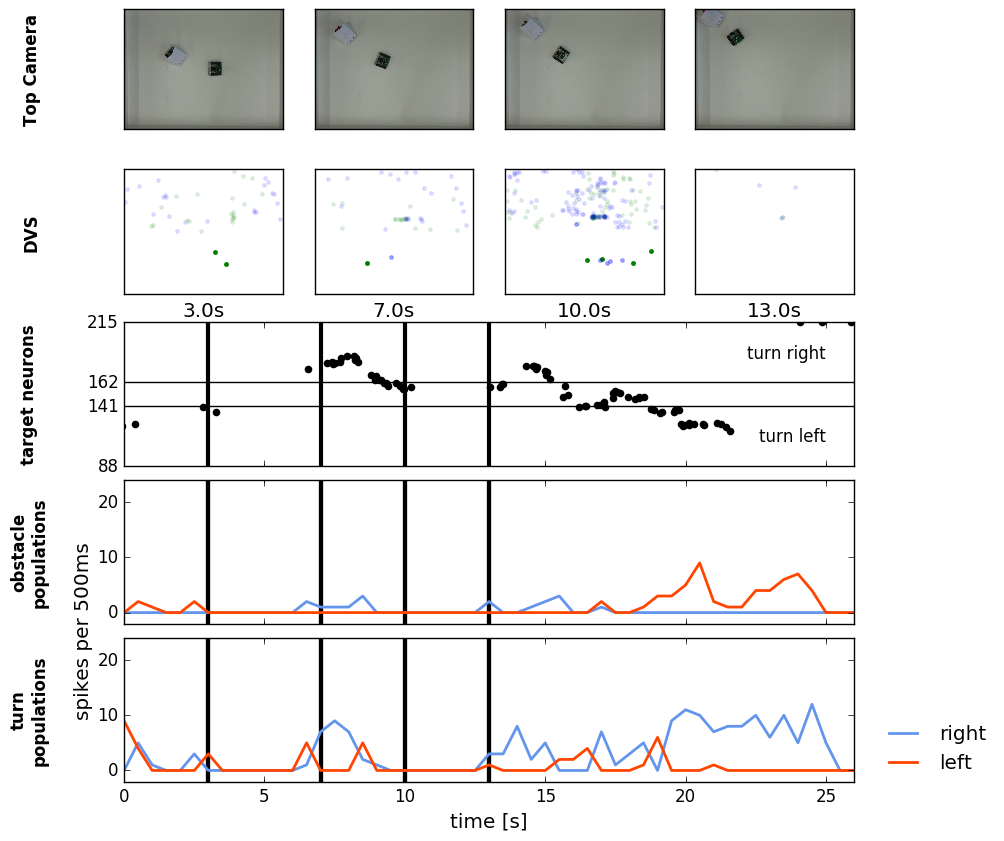

In [117]:
# edvs prints
timestamps = [3000, 7000, 10000, 13000]



def edvs_image(timestamp):
    # get current axis
    ax = plt.gca()
    # get data
    data = exp.df_edvs[exp.df_edvs['timestamp'] > timestamp - 1000][exp.df_edvs['timestamp'] < timestamp]
    plot_dvs(data, timestamp, off_events=True)
    ax.set_xticks([])
    ax.set_yticks([])

fig = plt.figure(figsize=(10, 10)) 
gs = gridspec.GridSpec(5, 1) 
gs.update(left=0.12, right=0.85, hspace=0.1)

row_title_style = {
    'size': 'large',
    'weight': 'bold',
    'labelpad': 35
}

plot_style = {
    'lw': 2
}

label_style = {
    'size': 'x-large'
}

number_style = {
    'size': 'x-large'
}

tick_style = {
    'labelsize': 'large'
}

# DVS
# row_grid = gridspec.GridSpecFromSubplotSpec(1, 4, subplot_spec=gs[0, :])
row_grid = gridspec.GridSpec(5, 4, left=0.12, right=0.85, hspace=0.3)

i = 0
for timestamp in timestamps:
    aximg = plt.subplot(row_grid[0, i])
    img = img=mpimg.imread(snap_folder + '/%s_%d.png' % ('follow_target', i+1))
    plt.imshow(img)
    aximg.set_xticks([])
    aximg.set_yticks([])
    
    plt.subplot(row_grid[1, i])
    edvs_image(timestamp)
    plt.gca().set_xlabel('{:.1f}s'.format(timestamp/1000), **label_style)
    if (i == 0):
        aximg.set_ylabel('Top Camera', **{**row_title_style, 'labelpad': 60})
        plt.gca().set_ylabel('DVS', **{**row_title_style, 'labelpad': 60})
    i += 1
    
    
# gs = gridspec.GridSpec(3, 1) 
# gs.update(left=0.12, right=0.85, hspace=0.1)

# target neurons
tgt = plt.subplot(gs[2, :])
target_population = data_rolls[data_rolls['neuron'] >= 88][data_rolls['neuron'] <= 215]
plt.scatter(target_population['timestamp'], target_population['neuron'], color='black')
tgt.set_ylim(88, 215)
tgt.set_ylabel('target neurons', **row_title_style)
tgt.set_yticks([88, 141, 162, 215],)
for timestamp in timestamps:
    plt.vlines(timestamp, tgt.get_ylim()[0], tgt.get_ylim()[1], linewidth=3)

# gs.update(hspace=0.2)

# obstacle populations
ax1 = plt.subplot(gs[3, :], sharex=tgt)
firing_rates[0].plot(label='right', color='#6495ed', **plot_style)
firing_rates[1].plot(label='left', color='#ff4500', **plot_style)
ax1.set_ylim(-2, 24)
ax1.set_yticks([0, 10, 20])
# ax1.set_ylim(-2, 18)
# ax1.set_yticks([0, 5, 10, 15])
for timestamp in timestamps:
    plt.vlines(timestamp, ax1.get_ylim()[0], ax1.get_ylim()[1], linewidth=3)
# fig.text(0.04, 0.79, 'obstacle\npopulations', **row_title_style)
ax1.set_ylabel('obstacle\npopulations', **row_title_style)
# leg = plt.legend(bbox_to_anchor=(1, 1))
leg = plt.legend(bbox_to_anchor=(1, 0.20), bbox_transform=plt.gcf().transFigure, prop={'size':'x-large'})
leg.get_frame().set_linewidth(0.0)
for timestamp in timestamps:
    plt.vlines(timestamp, ax1.get_ylim()[0], ax1.get_ylim()[1], linewidth=3)

# turn populations
ax15 = plt.subplot(gs[4, :], sharex=ax1)
firing_rates[2].plot(label='right', color='#6495ed', **plot_style)
firing_rates[3].plot(label='left', color='#ff4500', **plot_style)
ax15.set_ylim(-2, 24)
ax15.set_yticks([0, 10, 20])
# ax15.set_ylim(-2, 18)
# ax15.set_yticks([0, 5, 10, 15])
for timestamp in timestamps:
    plt.vlines(timestamp, ax15.get_ylim()[0], ax15.get_ylim()[1], linewidth=3)
# fig.text(0.04, 0.53, 'turn\npopulations', **row_title_style)
ax15.set_ylabel('turn\npopulations', **row_title_style)
fig.text(0.07, 0.35, 'spikes per 500ms', rotation='vertical', **label_style)

# relabel to seconds
ax15.set_xticklabels(["{:.0f}".format(x/1000) for x in ax15.get_xticks()])
ax15.set_xlabel('time [s]', **label_style)
for timestamp in timestamps:
    plt.vlines(timestamp, ax15.get_ylim()[0], ax15.get_ylim()[1], linewidth=3)
    
# 2 lines for turn effects
annotate_style= {
    'verticalalignment': 'center',
    'horizontalalignment': 'right',
    'size': 'large'
}

tgt.hlines(141, tgt.get_xlim()[0], tgt.get_xlim()[1], linewidth=1)
tgt.text(ax15.get_xlim()[1] - 1000, int((tgt.get_ylim()[0] + 141)/2), 'turn left', **annotate_style)
tgt.hlines(162, tgt.get_xlim()[0], tgt.get_xlim()[1], linewidth=1)
tgt.text(ax15.get_xlim()[1] - 1000, int((tgt.get_ylim()[1] + 162)/2), 'turn right', **annotate_style)
for timestamp in timestamps:
    plt.vlines(timestamp, tgt.get_ylim()[0], tgt.get_ylim()[1], linewidth=3)
    
# numbers for vertical lines
# i = 1
# for timestamp in timestamps:
#     tgt.text(timestamp - 800, tgt.get_ylim()[1] - 20, i, **label_style)
#     i += 1

tgt.tick_params(**tick_style)
ax1.tick_params(**tick_style)
ax15.tick_params(**tick_style)
ax2.tick_params(**tick_style)
ax3.tick_params(**tick_style)

plt.show()

raw_dir = '/Users/hermann/Dropbox/ETH/9_Semester/NeuroBot/RobotNav_SemesterProject/Plots/raw/'
save_dir = raw_dir + exp.experiment_name
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
fig.savefig("{}/{}_time_series.pdf".format(save_dir, exp.experiment_name), dpi=90)

In [34]:
def plot_dvs(data, time, off_events=False, 
             show_hist=True, normalize_hist=False, save=False):
    interval = 1500
    df = data
    ts_start= time - interval
    
    cIndex = np.logical_and(df['timestamp'] >= ts_start, df['timestamp'] <= ts_start + interval)

    plot_index = np.logical_and(cIndex, df['pol'] == 1)
    data = df[plot_index]
    lower_half_on = np.logical_and(plot_index, df['y'] <= 64)

    plot_index = np.logical_and(cIndex, df['pol'] == 0)
    data_off = df[plot_index]
    lower_half_off = np.logical_and(plot_index, df['y'] <= 64)
 
    ax0 = plt.gca()
    # first plot events in the upper half with a smaller alpha
    ax0.scatter(data['x'][data['y']>64], data['y'][data['y']>64], 
                c='g', marker='.', edgecolors='g', s=25, alpha=0.1)
#         if off_events:
    ax0.scatter(data_off['x'][data_off['y']>64], data_off['y'][data_off['y']>64], 
                c='b', marker='.', edgecolors='b', s=25, alpha=0.1)
    ax0.scatter(data['x'][data['y']<64], data['y'][data['y']<64], 
                c='g', marker='.', edgecolors='g', s=25, alpha=1)
    if off_events:
        ax0.scatter(data_off['x'][data_off['y']<64], data_off['y'][data_off['y']<64], 
                    c='b', marker='.', edgecolors='b', s=25, alpha=0.3)

    #ax0.set_axis_bgcolor('black')
    ax0.set_xlim(0, 128)
    ax0.set_ylim(0, 128)

/Users/hermann/Dropbox/ETH/9_Semester/NeuroBot/eDVS_event_display_server_udp/py3/lib/python3.5/site-packages/ipykernel/__main__.py:33: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


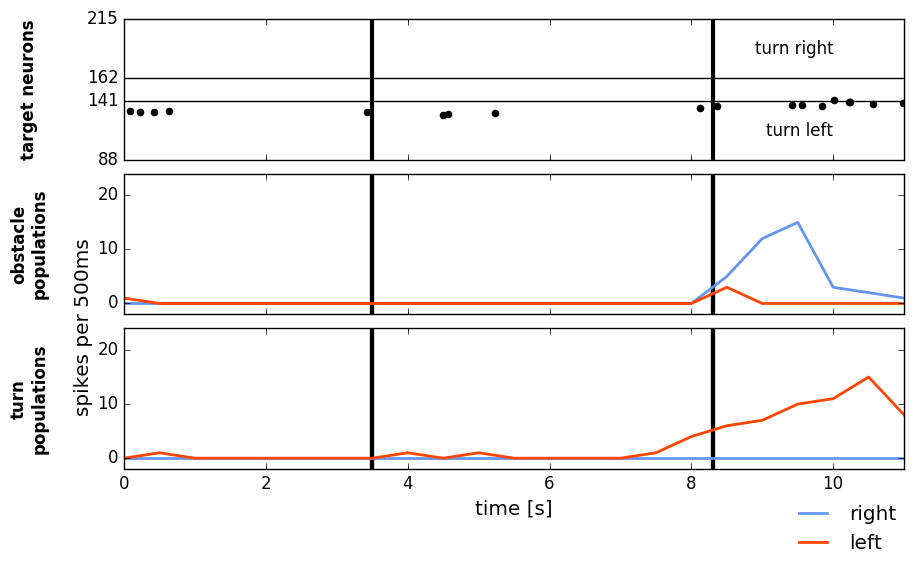

In [150]:
# edvs prints
timestamps = [3500, 8300]

fig = plt.figure(figsize=(10, 6)) 
gs = gridspec.GridSpec(3, 1) 
gs.update(left=0.12, bottom=0.15,hspace=0.1)

row_title_style = {
    'size': 'large',
    'weight': 'bold',
    'labelpad': 35
}

plot_style = {
    'lw': 2
}

label_style = {
    'size': 'x-large'
}

number_style = {
    'size': 'x-large'
}

tick_style = {
    'labelsize': 'large'
}


# target neurons
tgt = plt.subplot(gs[0, :])
target_population = data_rolls[data_rolls['neuron'] >= 88][data_rolls['neuron'] <= 215]
plt.scatter(target_population['timestamp'], target_population['neuron'], color='black')
tgt.set_ylim(88, 215)
tgt.set_ylabel('target neurons', **row_title_style)
tgt.set_yticks([88, 141, 162, 215],)
for timestamp in timestamps:
    plt.vlines(timestamp, tgt.get_ylim()[0], tgt.get_ylim()[1], linewidth=3)

# gs.update(hspace=0.2)

# obstacle populations
ax1 = plt.subplot(gs[1, :], sharex=tgt)
firing_rates[0].plot(label='right', color='#6495ed', **plot_style)
firing_rates[1].plot(label='left', color='#ff4500', **plot_style)
ax1.set_ylim(-2, 24)
ax1.set_yticks([0, 10, 20])
# ax1.set_ylim(-2, 18)
# ax1.set_yticks([0, 5, 10, 15])
for timestamp in timestamps:
    plt.vlines(timestamp, ax1.get_ylim()[0], ax1.get_ylim()[1], linewidth=3)
# fig.text(0.04, 0.79, 'obstacle\npopulations', **row_title_style)
ax1.set_ylabel('obstacle\npopulations', **row_title_style)
# leg = plt.legend(bbox_to_anchor=(1, 1))
leg = plt.legend(bbox_to_anchor=(0.91, 0.12), bbox_transform=plt.gcf().transFigure, prop={'size':'x-large'})
leg.get_frame().set_linewidth(0.0)
for timestamp in timestamps:
    plt.vlines(timestamp, ax1.get_ylim()[0], ax1.get_ylim()[1], linewidth=3)

# turn populations
ax15 = plt.subplot(gs[2, :], sharex=ax1)
firing_rates[2].plot(label='right', color='#6495ed', **plot_style)
firing_rates[3].plot(label='left', color='#ff4500', **plot_style)
ax15.set_ylim(-2, 24)
ax15.set_yticks([0, 10, 20])
# ax15.set_ylim(-2, 18)
# ax15.set_yticks([0, 5, 10, 15])
for timestamp in timestamps:
    plt.vlines(timestamp, ax15.get_ylim()[0], ax15.get_ylim()[1], linewidth=3)
# fig.text(0.04, 0.53, 'turn\npopulations', **row_title_style)
ax15.set_ylabel('turn\npopulations', **row_title_style)
fig.text(0.07, 0.51, 'spikes per 500ms', rotation='vertical', **label_style)

# relabel to seconds
ax15.set_xticklabels(["{:.0f}".format(x/1000) for x in ax15.get_xticks()])
ax15.set_xlabel('time [s]', **label_style)
for timestamp in timestamps:
    plt.vlines(timestamp, ax15.get_ylim()[0], ax15.get_ylim()[1], linewidth=3)
    
# 2 lines for turn effects
annotate_style= {
    'verticalalignment': 'center',
    'horizontalalignment': 'right',
    'size': 'large'
}

tgt.hlines(141, tgt.get_xlim()[0], tgt.get_xlim()[1], linewidth=1)
tgt.text(ax15.get_xlim()[1] - 1000, int((tgt.get_ylim()[0] + 141)/2), 'turn left', **annotate_style)
tgt.hlines(162, tgt.get_xlim()[0], tgt.get_xlim()[1], linewidth=1)
tgt.text(ax15.get_xlim()[1] - 1000, int((tgt.get_ylim()[1] + 162)/2), 'turn right', **annotate_style)
for timestamp in timestamps:
    plt.vlines(timestamp, tgt.get_ylim()[0], tgt.get_ylim()[1], linewidth=3)
    
# numbers for vertical lines
# i = 1
# for timestamp in timestamps:
#     tgt.text(timestamp - 800, tgt.get_ylim()[1] - 20, i, **label_style)
#     i += 1

tgt.tick_params(**tick_style)
ax1.tick_params(**tick_style)
ax15.tick_params(**tick_style)
ax2.tick_params(**tick_style)
ax3.tick_params(**tick_style)

plt.show()

raw_dir = '/Users/hermann/Dropbox/ETH/9_Semester/NeuroBot/RobotNav_SemesterProject/Plots/raw/'
save_dir = raw_dir + exp.experiment_name
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
fig.savefig("{}/{}_activity.pdf".format(save_dir, exp.experiment_name), dpi=90)

/Users/hermann/Dropbox/ETH/9_Semester/NeuroBot/eDVS_event_display_server_udp/py3/lib/python3.5/site-packages/ipykernel/__main__.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


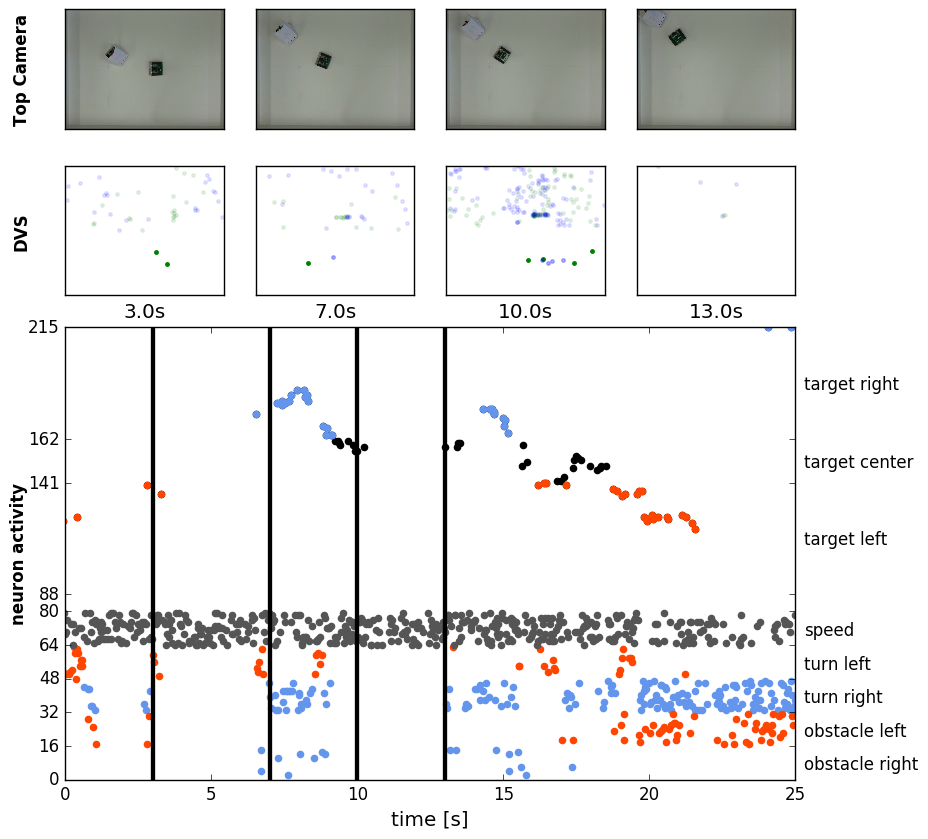

In [186]:
# edvs prints
timestamps = [3000, 7000, 10000, 13000]



def edvs_image(timestamp):
    # get current axis
    ax = plt.gca()
    # get data
    data = exp.df_edvs[exp.df_edvs['timestamp'] > timestamp - 1000][exp.df_edvs['timestamp'] < timestamp]
    plot_dvs(data, timestamp, off_events=True)
    ax.set_xticks([])
    ax.set_yticks([])

fig = plt.figure(figsize=(10, 10)) 
gs = gridspec.GridSpec(5, 4) 
gs.update(left=0.12, right=0.85, hspace=0.25)

row_title_style = {
    'size': 'large',
    'weight': 'bold',
    'labelpad': 0
}

plot_style = {
    'lw': 2
}

label_style = {
    'size': 'x-large'
}

number_style = {
    'size': 'x-large'
}

tick_style = {
    'labelsize': 'large'
}

i = 0
for timestamp in timestamps:
    aximg = plt.subplot(gs[0, i])
    img = img=mpimg.imread(snap_folder + '/%s_%d.png' % ('follow_target', i+1))
    plt.imshow(img)
    aximg.set_xticks([])
    aximg.set_yticks([])
    
    plt.subplot(gs[1, i])
    edvs_image(timestamp)
    plt.gca().set_xlabel('{:.1f}s'.format(timestamp/1000), **label_style)
    if (i == 0):
        aximg.set_ylabel('Top Camera', **{**row_title_style, 'labelpad': 25})
        plt.gca().set_ylabel('DVS', **{**row_title_style, 'labelpad': 25})
    i += 1
    
    
# gs = gridspec.GridSpec(3, 1) 
# gs.update(left=0.12, right=0.85, hspace=0.1)

# target neurons
tgt = plt.subplot(gs[2:5, :])
target_center_population = rolls_frame[rolls_frame['group'] == 7]
left_population = rolls_frame[rolls_frame['group'].apply(lambda x: x in [1, 3, 6])]
right_population = rolls_frame[rolls_frame['group'].apply(lambda x: x in [0, 2, 8])]
speed_population = rolls_frame[rolls_frame['group'] == 4]
plt.scatter(target_population['timestamp'], target_population['neuron'], color='black')
plt.scatter(right_population['timestamp'], right_population['neuron'], color='#6495ed')
plt.scatter(left_population['timestamp'], left_population['neuron'], color='#ff4500')
plt.scatter(speed_population['timestamp'], speed_population['neuron'], color='#555555')
tgt.set_ylim(0, 215)
tgt.set_ylabel('neuron activity', **row_title_style)
tgt.set_yticks([0, 16, 32, 48, 64, 80, 88, 141, 162, 215],)
for timestamp in timestamps:
    plt.vlines(timestamp, tgt.get_ylim()[0], tgt.get_ylim()[1], linewidth=3)
tgt.set_xlim(0, 25000)

# relabel to seconds
tgt.set_xticklabels(["{:.0f}".format(x/1000) for x in tgt.get_xticks()])
tgt.set_xlabel('time [s]', **label_style)
# for timestamp in timestamps:
#     plt.vlines(timestamp, ax15.get_ylim()[0], ax15.get_ylim()[1], linewidth=3)
    
# 2 lines for turn effects
annotate_style= {
    'verticalalignment': 'center',
    'horizontalalignment': 'left',
    'size': 'large'
}

# lines = [31.5, 63.5, 80, 88, 141, 162]

# for line in lines:
#     tgt.hlines(line, tgt.get_xlim()[0], tgt.get_xlim()[1], linewidth=1)

tgt.text(25300, int((0 + 15)/2), 'obstacle right', **annotate_style)
tgt.text(25300, int((16 + 31)/2), 'obstacle left', **annotate_style)
tgt.text(25300, int((32 + 47)/2), 'turn right', **annotate_style)
tgt.text(25300, int((48 + 63)/2), 'turn left', **annotate_style)
tgt.text(25300, int((64 + 79)/2), 'speed', **annotate_style)
tgt.text(25300, int((88 + 141)/2), 'target left', **annotate_style)
tgt.text(25300, int((142 + 161)/2), 'target center', **annotate_style)
tgt.text(25300, int((215 + 162)/2), 'target right', **annotate_style)
for timestamp in timestamps:
    plt.vlines(timestamp, tgt.get_ylim()[0], tgt.get_ylim()[1], linewidth=3)
    
# numbers for vertical lines
# i = 1
# for timestamp in timestamps:
#     tgt.text(timestamp - 800, tgt.get_ylim()[1] - 20, i, **label_style)
#     i += 1

tgt.tick_params(**tick_style)
ax1.tick_params(**tick_style)
ax15.tick_params(**tick_style)
ax2.tick_params(**tick_style)
ax3.tick_params(**tick_style)

plt.show()

raw_dir = '/Users/hermann/Dropbox/ETH/9_Semester/NeuroBot/RobotNav_SemesterProject/Plots/raw/'
save_dir = raw_dir + exp.experiment_name
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
fig.savefig("{}/{}_spikes.pdf".format(save_dir, exp.experiment_name), dpi=90)

In [162]:
1 in [0, 1]

True